In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [36]:
A = 'Quality_data.csv'

quality_data = pd.read_csv(A)
quality_data

,Product ID,Product characteristic 1,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Quality Characteristic 7,Quality Characteristic 8,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date
0,26.0,1,412,653,248,172,s,a,0,A,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24
1,50.0,2,408,793,221,147,s,b,0,A,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42
2,72.0,1,407,608,210,117,s,a,0,A,APU3b,4,O,a,b,0.0,1,01.10.18 15:39:57,01.10.18 16:50:40
3,72.0,1,407,608,248,142,s,a,0,A,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53
4,74.0,2,408,508,205,176,s,b,0,A,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18908,NaN,1,407,628,210,122,s,b,0,A,APU3b,1,I,a,m,0.0,1,31.01.19 22:15:06,31.01.19 22:15:06
18909,NaN,1,407,655,229,172,s,b,0,A,APU3b,1,I,a,m,0.0,1,31.01.19 22:16:17,31.01.19 22:22:51
18910,NaN,2,407,657,266,122,s,b,0,A,APU3b,1,I,a,b,0.0,1,31.01.19 22:27:37,31.01.19 22:36:22
18911,NaN,1,407,655,229,172,s,b,0,A,APU3b,1,I,a,m,0.0,1,31.01.19 22:43:50,31.01.19 22:50:55


In [37]:
new_quality = quality_data

for i in range(len(quality_data)-1, -1 , -1):
    if np.array(quality_data.iloc[i, 14:15]) == 'b' or (np.array(quality_data.iloc[i, 0:1])[0] > 0) == False:
        new_quality = new_quality.drop(new_quality.index[i])

In [38]:
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Quality Characteristic 7,Quality Characteristic 8,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date
0,26.0,1,412,653,248,172,s,a,0,A,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24
1,50.0,2,408,793,221,147,s,b,0,A,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42
3,72.0,1,407,608,248,142,s,a,0,A,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53
4,74.0,2,408,508,205,176,s,b,0,A,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50
5,74.0,2,410,508,219,176,s,b,0,A,APU3b,3,I,b,d,0.0,1,01.10.18 07:50:14,01.10.18 09:42:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,407,655,282,172,s,b,0,A,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29
18879,76606.0,2,406,509,216,103,s,a,0,A,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00
18880,76611.0,2,407,655,282,172,s,b,0,A,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26
18881,76612.0,2,407,655,229,172,s,b,0,A,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07


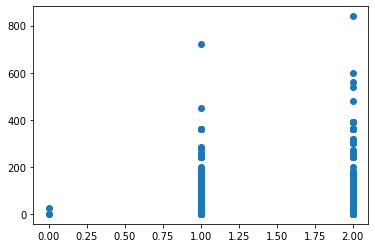

In [39]:
plt.plot(np.array(new_quality.iloc[:, 16:17]), np.array(new_quality.iloc[:, 15:16]), 'o')

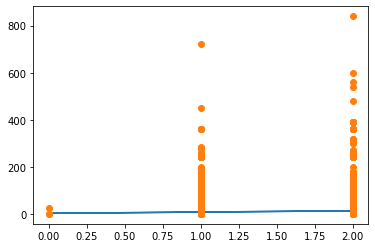

In [40]:
Y = np.matrix(new_quality.iloc[:, 15:16])

X = np.matrix(new_quality.iloc[:, 16:17])

k = len(X)

if np.shape(X)[0] == 1:
    X = np.transpose(X)

X_mod = np.c_[np.ones(k), X]

#if np.shape(Y)[0] == 1:
 #   Y_mod = np.transpose(Y)
    
Y_mod = Y
    
def least_squares_variables():
    A = []
    j = 0
    A_whole = np.linalg.inv(np.transpose(X_mod) * X_mod) * np.transpose(X_mod) * Y_mod
    A.append(A_whole)
    return A
A = least_squares_variables()

# Once the linear coefficents have been calculated, the predicted y-cooridnates can be easily calculated
# as follows.

"Initial line(s) of best fit"

Y_linear = np.zeros(np.shape(X))
j = 0
i = 0
for i in range(k):
    Y_linear[i] =  np.float(A[j][0]) + np.float(A[j][1]) * X[i]
    
    
# Line of best fit for the rework minutes (y-axis) against the quality rating (x-axis). As you can see, a correlation test will
# not work beacuse the data is heavily skewed and there are too few values for quality rating. 


plt.plot(X[:],Y_linear[:])
plt.plot(X[:], Y_mod[:], 'o')

In [41]:
# Measurement of skeweness for the data.

print(new_quality.skew())

Product ID                   0.052374
Product characteristic 1     0.222585
Quality Characteristic 1     1.844316
Quality Characteristic 2     0.086148
Quality Characteristic 3     0.889886
Quality Characteristic 4     0.104282
Quality Characteristic 7     6.544478
Process Characteristic 2     0.012699
Rework Minutes               7.535727
Quality rating               1.471586
dtype: float64


Text(0.5, 1.0, 'Violin plot of Rework Minutes')

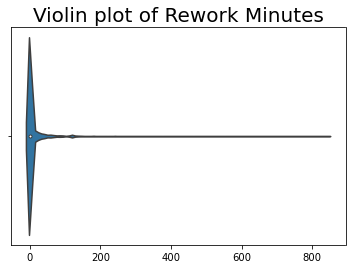

In [42]:
sns.violinplot(Y).set_title("Violin plot of Rework Minutes", size = 20)

Text(0.5, 1.0, 'Violin plot of quality rating')

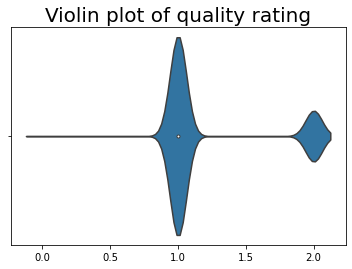

In [43]:
sns.violinplot(X).set_title("Violin plot of quality rating", size = 20)

In [44]:
nozero_quality = new_quality

for i in range(len(new_quality)-1, -1 , -1):
    if np.array(new_quality.iloc[i, 15:16]) == 0:
        nozero_quality = nozero_quality.drop(nozero_quality.index[i])

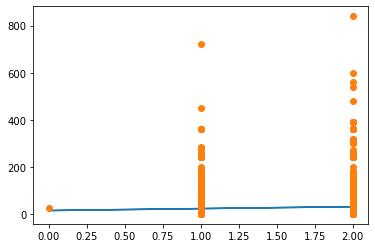

In [45]:
Y = np.matrix(nozero_quality.iloc[:, 15:16])

X = np.matrix(nozero_quality.iloc[:, 16:17])

k = len(X)

if np.shape(X)[0] == 1:
    X = np.transpose(X)

X_mod = np.c_[np.ones(k), X]

#if np.shape(Y)[0] == 1:
 #   Y_mod = np.transpose(Y)
    
Y_mod = Y
    
def least_squares_variables():
    A = []
    j = 0
    A_whole = np.linalg.inv(np.transpose(X_mod) * X_mod) * np.transpose(X_mod) * Y_mod
    A.append(A_whole)
    return A
A = least_squares_variables()

# Once the linear coefficents have been calculated, the predicted y-cooridnates can be easily calculated
# as follows.

"Initial line(s) of best fit"

Y_linear = np.zeros(np.shape(X))
j = 0
i = 0
for i in range(k):
    Y_linear[i] =  np.float(A[j][0]) + np.float(A[j][1]) * X[i]
    
# There is slight improvement when the data containg `rework minutes' = 0 but not much.    

plt.plot(X[:],Y_linear[:])
plt.plot(X[:], Y_mod[:], 'o')

In [46]:
quality_data.skew()

Product ID                   0.116218
Product characteristic 1     0.207190
Quality Characteristic 1     2.211331
Quality Characteristic 2     0.129689
Quality Characteristic 3     0.797046
Quality Characteristic 4     0.118523
Quality Characteristic 7     4.287207
Process Characteristic 2     0.062819
Rework Minutes               9.107313
Quality rating               1.719865
dtype: float64

In [47]:
quality_data.iloc[:,1:2]

,Product characteristic 1
0,1
1,2
2,1
3,1
4,2
...,...
18908,1
18909,1
18910,2
18911,1


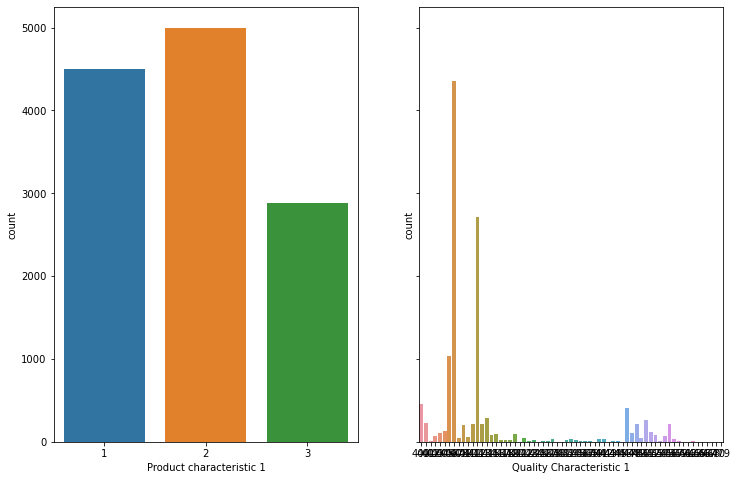

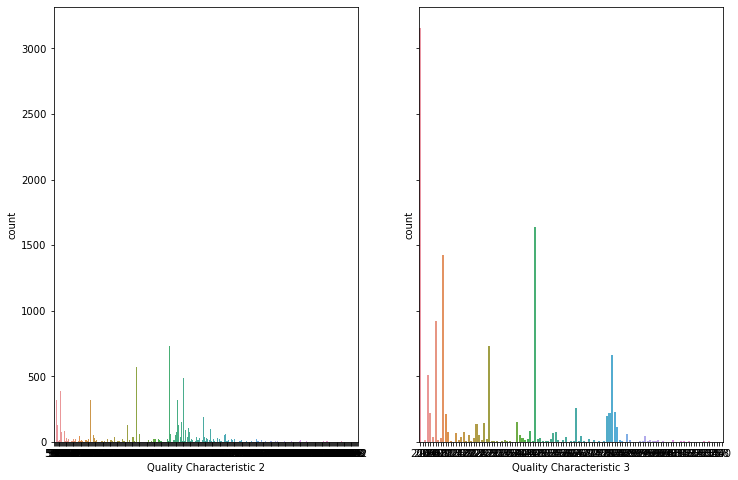

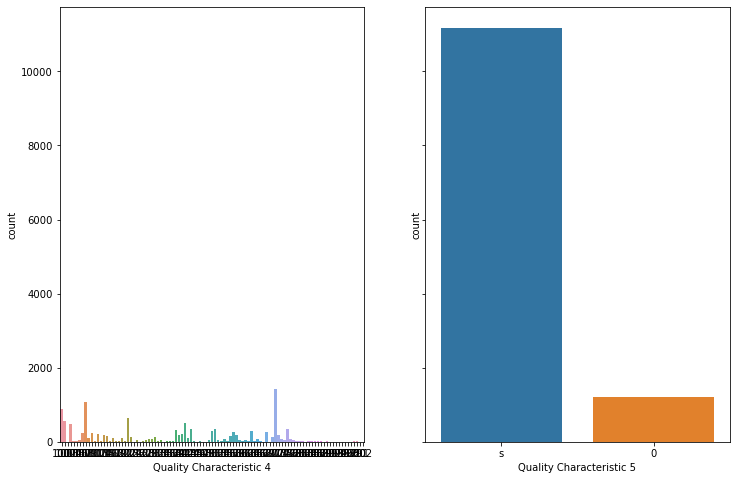

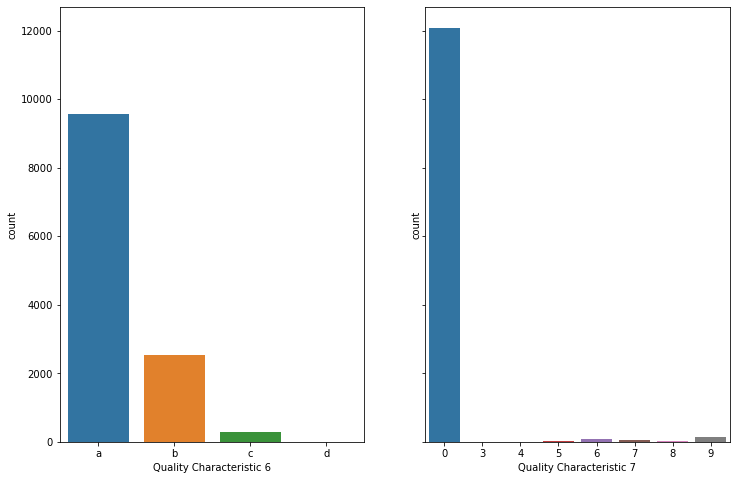

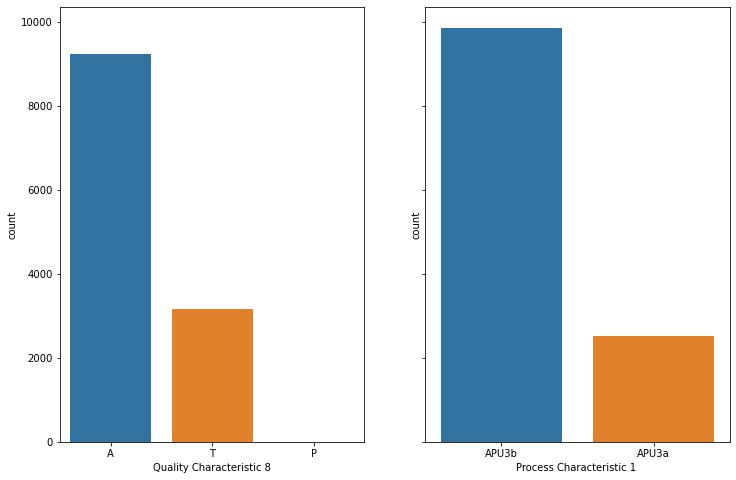

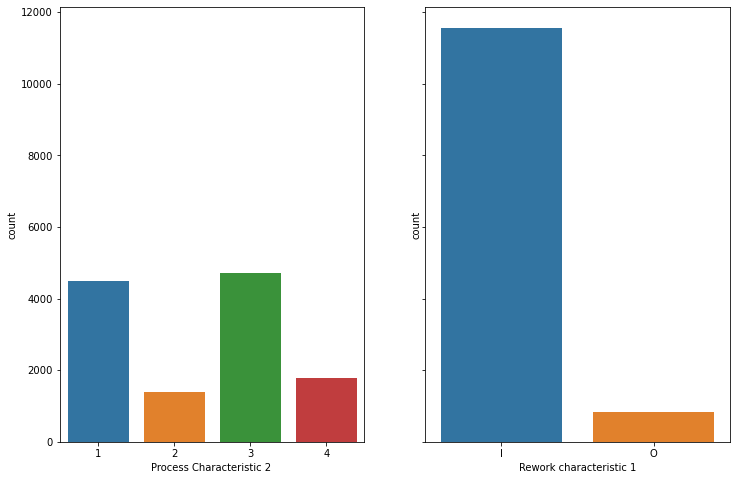

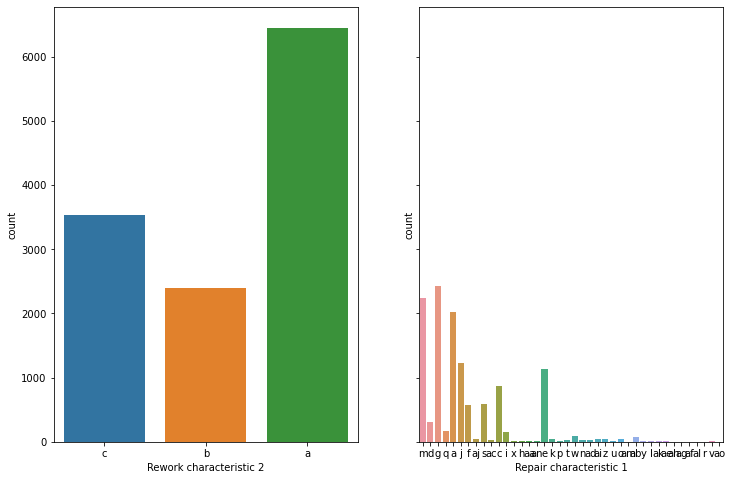

In [48]:
# Count of each label in each category
data = new_quality.iloc[:, 1:15]

#names of all the columns
cols = data.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 2
n_rows = 7
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=data, ax=ax[j])

In [52]:
le = preprocessing.LabelEncoder()

In [53]:
cont_quality = new_quality.iloc[:, 1:16]

In [54]:
cont_quality['Quality Characteristic 5'] = le.fit_transform(np.array(cont_quality.iloc[:,5:6]))
cont_quality['Quality Characteristic 6'] = le.fit_transform(np.array(cont_quality.iloc[:,6:7]))
cont_quality['Quality Characteristic 7'] = le.fit_transform(np.array(cont_quality.iloc[:,7:8]))
cont_quality['Quality Characteristic 8'] = le.fit_transform(np.array(new_quality.iloc[:,8:9]))
cont_quality.iloc[:, 9:10] = le.fit_transform(np.array(new_quality.iloc[:,9:10]))
cont_quality['Rework characteristic 1'] = le.fit_transform(np.array(new_quality.iloc[:,11:12]))
cont_quality['Rework characteristic 2'] = le.fit_transform(np.array(new_quality.iloc[:,12:13]))
cont_quality['Repair characteristic 1'] = le.fit_transform(np.array(new_quality.iloc[:,13:14]))

C:\Users\James\Anaconda\envs\notebook\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
cont_quality

,Product characteristic 1,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Quality Characteristic 7,Quality Characteristic 8,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes
0,1,412,653,248,172,1,0,0,0,0,1,0,0,2,0.0
1,2,408,793,221,147,1,1,0,0,0,1,0,0,1,285.0
3,1,407,608,248,142,1,0,0,0,0,2,1,0,2,0.5
4,2,408,508,205,176,1,1,0,0,0,3,2,0,1,25.0
5,2,410,508,219,176,1,1,0,0,0,3,2,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,1,407,655,282,172,1,1,0,0,0,1,0,0,0,0.0
18879,2,406,509,216,103,1,0,0,0,0,3,2,1,2,60.0
18880,2,407,655,282,172,1,1,0,0,0,1,0,0,0,0.0
18881,2,407,655,229,172,1,1,0,0,0,1,0,0,2,0.4


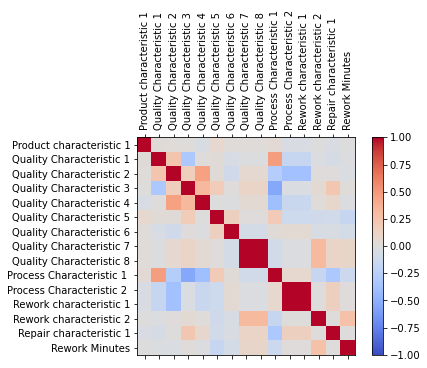

In [56]:
corr = cont_quality.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cont_quality.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cont_quality.columns)
ax.set_yticklabels(cont_quality.columns)
plt.show()

In [68]:
size = len(np.array(cont_quality)[0]) 
cols = cont_quality.columns


# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = cont_quality.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.2

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))


#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

Quality Characteristic 3 and Process Characteristic 1  = -0.54
Quality Characteristic 1 and Process Characteristic 1  = 0.47
Quality Characteristic 2 and Quality Characteristic 4 = 0.45
Quality Characteristic 4 and Process Characteristic 1  = -0.38
Quality Characteristic 2 and Process Characteristic 2  = -0.37
Quality Characteristic 2 and Rework characteristic 1 = -0.37
Quality Characteristic 3 and Quality Characteristic 4 = 0.33
Process Characteristic 1  and Repair characteristic 1 = -0.31
Quality Characteristic 7 and Rework characteristic 2 = 0.31
Quality Characteristic 8 and Rework characteristic 2 = 0.31
Quality Characteristic 1 and Quality Characteristic 3 = -0.31
Quality Characteristic 2 and Process Characteristic 1  = -0.27
Rework characteristic 2 and Rework Minutes = 0.27
Quality Characteristic 1 and Quality Characteristic 2 = 0.24
Quality Characteristic 3 and Repair characteristic 1 = 0.22


In [69]:
B = 'Process_disturbances.csv'

process_disturbances = pd.read_csv(B)
process_disturbances

,Start,End,Total duration,Alarm text,Alarm class
0,01/10/2018 01:35,01/10/2018 06:00,"15,897",a,S
1,01/10/2018 03:04,01/10/2018 06:00,"10,538",b,E
2,01/10/2018 06:00,01/10/2018 06:00,14,a,S
3,01/10/2018 06:15,01/10/2018 06:16,71,a,S
4,01/10/2018 06:15,01/10/2018 06:16,66,c,O
...,...,...,...,...,...
15631,31/01/2019 11:30,31/01/2019 11:45,906,c,O
15632,31/01/2019 11:52,31/01/2019 11:53,28,a,S
15633,31/01/2019 11:52,31/01/2019 11:53,23,c,O
15634,31/01/2019 11:57,31/01/2019 11:58,33,a,S


In [70]:
C = 'Product_tracking_information.csv'

#tracking points
#Z3200 - entry into process
#Z3299 - exit out of process

track_info = pd.read_csv(C)
track_info

,ZPKT,Format Date,Product ID
0,Z3200,01/10/2018 01:34,147
1,Z3200,01/10/2018 06:00,149
2,Z3299,01/10/2018 06:00,114
3,Z3200,01/10/2018 06:01,156
4,Z3299,01/10/2018 06:01,160
...,...,...,...
142280,Z3299,24/01/2019 20:21,71481
142281,Z3299,24/01/2019 20:28,71492
142282,Z3299,24/01/2019 20:30,71486
142283,Z3299,24/01/2019 20:31,71490
